In [21]:
import numpy as np
import pandas as pd

from datetime import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('/Users/kimginam/Downloads/Culture_travel/collected_data/culture_performance.csv',parse_dates=['date'])

In [23]:
df = df[['date','soldticket']]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        79 non-null     datetime64[ns]
 1   soldticket  79 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ KB


In [25]:
df

,date,soldticket
0,2014-01-01,"119,339"
1,2014-02-01,"117,243"
2,2014-03-01,"168,543"
3,2014-04-01,"174,613"
4,2014-05-01,"182,179"
...,...,...
74,2020-03-01,"161,893"
75,2020-04-01,"116,410"
76,2020-05-01,"245,833"
77,2020-06-01,"238,208"


In [26]:
df['soldticket'] = df['soldticket'].str.replace(',','').astype(int)

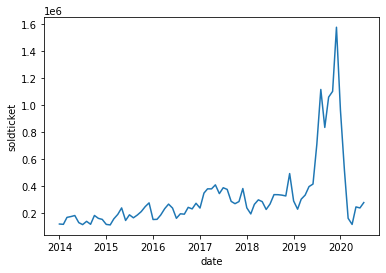

In [27]:
sns.lineplot(df['date'],df['soldticket'])

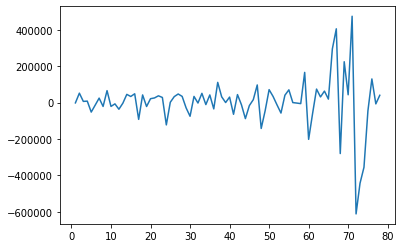

In [32]:
plt.plot(train)

In [28]:
train = df['soldticket']

In [30]:
train = train.diff().dropna()

In [31]:
train

1      -2096.0
2      51300.0
3       6070.0
4       7566.0
5     -52576.0
        ...   
74   -355960.0
75    -45483.0
76    129423.0
77     -7625.0
78     39671.0
Name: soldticket, Length: 78, dtype: float64

In [29]:
from pmdarima.arima import auto_arima

model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=2098.729, BIC=2108.207, Fit time=0.043 seconds
Fit ARIMA: order=(0, 0, 0); AIC=2196.193, BIC=2200.932, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=2097.855, BIC=2104.963, Fit time=0.015 seconds
Fit ARIMA: order=(0, 0, 1); AIC=2144.510, BIC=2151.618, Fit time=0.010 seconds
Fit ARIMA: order=(2, 0, 0); AIC=2098.325, BIC=2107.803, Fit time=0.022 seconds
Fit ARIMA: order=(2, 0, 1); AIC=2099.794, BIC=2111.641, Fit time=0.057 seconds
Total fit time: 0.154 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   79
Model:                     ARMA(1, 0)   Log Likelihood               -1045.927
Method:                       css-mle   S.D. of innovations         134965.273
Date:                Mon, 10 Aug 2020   AIC                           2097.855
Time:                        10:30:37   BIC                           2104.963
Sample:               

In [152]:
from pmdarima.arima import auto_arima
model_arima= auto_arima(train,trace=True, error_action='ignore',start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(train)

Fit ARIMA: order=(1, 1, 1); AIC=2078.611, BIC=2088.038, Fit time=0.052 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2072.786, BIC=2084.569, Fit time=0.059 seconds
Fit ARIMA: order=(1, 1, 3); AIC=2061.390, BIC=2075.530, Fit time=0.203 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2078.871, BIC=2090.655, Fit time=0.066 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2065.441, BIC=2079.582, Fit time=0.151 seconds
Fit ARIMA: order=(2, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 1); AIC=2076.174, BIC=2090.314, Fit time=0.069 seconds
Fit ARIMA: order=(3, 1, 2); AIC=2065.165, BIC=2081.662, Fit time=0.153 seconds
Fit ARIMA: order=(3, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.151 seconds


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [38]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order=(1,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.soldticket   No. Observations:                   78
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -1024.695
Method:                       css-mle   S.D. of innovations         119581.922
Date:                Mon, 10 Aug 2020   AIC                           2061.390
Time:                        10:32:57   BIC                           2075.530
Sample:                             1   HQIC                          2067.050
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5897.4742   1906.281      3.094      0.002    2161.232    9633.716
ar.L1.D.soldticket     0.2572      0.147      1.750      0.080      -0.031       0.545
ma.L1.D.soldticket  

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


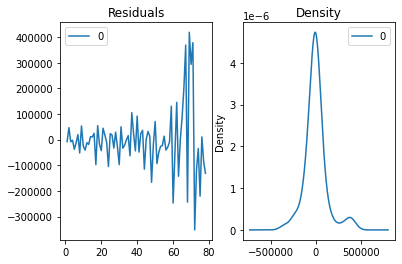

In [31]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

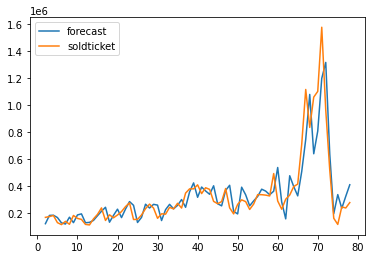

In [32]:
model_fit.plot_predict(dynamic=False)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


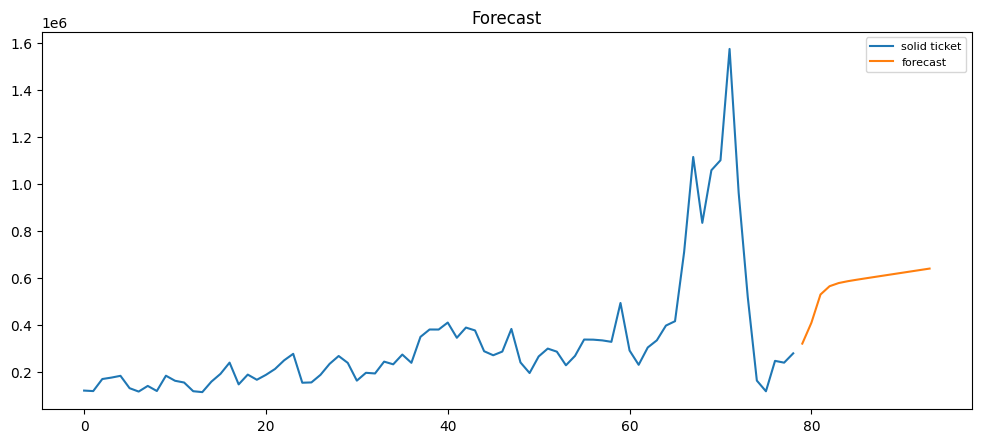

In [36]:
model = ARIMA(train, order=(1, 1, 3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=[79,80,81,82,83,84,85,86,87,88,89,90,91,92,93])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='solid ticket')
plt.plot(fc_series, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()